In [64]:
import torch
import dataLoader
from model import CNN_LSTM_2_WTB
import numpy as np
from keras.utils.np_utils import to_categorical
import plot_cm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
import pylab
import torch.nn as nn

In [2]:
##### 定义图片上的字体
font = {'family': 'Times New Roman',
         'style': 'normal',
         'weight': 'bold',
        #'color':  'darkred', 
        'size': 20,
        }
matplotlib.rc('font', **font)

In [65]:
dl = 0  ## 时延
ts = 26 ## 滑窗宽度
lb = 1  ## 步长
modelPath = "./checkpoints/WTB_icing/res_26_2/CNN-LSTM-3.t7"  ## 模型所在地址
origTestRoot = "./data/WTB_icing/orig/test"
testRoot = "./data/WTB_icing/test"
saveRoot = "./results/WTB_icing/res_26_2/"

In [4]:
##### 加载测试数据
X_test, y_test, mask_test = dataLoader.window_process2(origTestRoot, testRoot, dl, ts, lb)
X_test = np.array(X_test)
y_test = np.array(y_test)
mask_test = np.array(mask_test)
y_test_one = to_categorical(y_test, 2)

# # 对数据进行随机打乱
# permutation = np.random.permutation(X_test.shape[0])
# X_test = X_test[permutation, :, :, :]
# y_test_one = y_test_one[permutation, :]
# mask_test = mask_test[permutation, :, :]

inputs = torch.Tensor(X_test)
target = torch.Tensor(y_test_one)
mask = torch.Tensor(mask_test)  

In [5]:
print(X_test.shape)

(179123, 1, 26, 26)


In [68]:
##### 加载模型
net = CNN_LSTM_2_WTB.CNN_LSTM(ts)
checkpoint = torch.load(modelPath)
net.load_state_dict(checkpoint['net'])

<All keys matched successfully>

In [7]:
#### 特征维度递减
def reduceChan(x):
    AAP = nn.AdaptiveAvgPool1d(1)
    m_batchsize, C, W, H = x.size()
    B_C_WH = x.view(m_batchsize, C, -1)
    B_WH_C = B_C_WH.permute(0, 2, 1)
    B_WH_C_AVG = AAP(B_WH_C).view(m_batchsize, W, H)
    return B_WH_C_AVG

In [8]:
#### 归一化
def NB(a):
    amin, amax = a.min(), a.max() # 求最大最小值
    a = (a-amin)/(amax-amin) # (矩阵元素-最小值)/(最大值-最小值)
    return a

In [69]:
##### 运行模型
# inputs = inputs[1:100, :, :, :]
print(inputs.shape)
# mask = mask[1:100, :, :]
print(mask.shape)
net.eval()
with torch.no_grad():
    x1_atten, atten1, x2_atten, atten2, x1, x2, x3, x4, x = net(inputs, mask)

torch.Size([98, 1, 26, 26])
torch.Size([98, 26, 26])


In [70]:
sample = 1
print(target[sample])
# x_ = NB(X_test[sample].reshape(12, 52))
x0 = NB(reduceChan(inputs[sample:sample+1]).view(26, 26))
x1_ = NB(reduceChan(x1[sample:sample+1]).view(26, 26))
x1_atten_ = NB(reduceChan(x1_atten[sample:sample+1]).view(26, 26))
x2_ = NB(reduceChan(x2[sample:sample+1]).view(26, 26))
x2_atten_ = NB(reduceChan(x2_atten[sample:sample+1]).view(26, 26))
# atten2 = NB(reduceChan(atten2[sample:sample+1]).view(26, 26))
# x3_ = NB(reduceChan(x3[sample:sample+1]).view(26, 26))
# x4_ = NB(reduceChan(x4[sample:sample+1]).view(26, 26))

tensor([1., 0.])


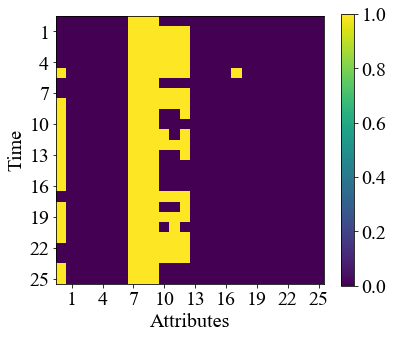

In [71]:
# sample = 20
# print(target[sample])
# for i in range(target.shape[0]):
#     if np.sum(target[i] == 0):
#         sample,append(i)
# print(target[sample])
mask_ = mask[sample]
plt.figure(figsize=(6,5))
plt.imshow(mask_)
plt.colorbar()
scale = [i for i in range(1,27,3)]
plt.xticks(scale)
plt.yticks(scale)
plt.ylabel('Time')
plt.xlabel('Attributes')
plt.savefig(saveRoot + str(sample) + "_mask.svg")

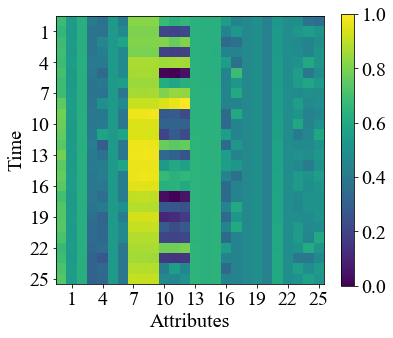

In [72]:
plt.figure(figsize=(6, 5))
plt.imshow(x0)
plt.colorbar()
scale = [i for i in range(1,27,3)]
plt.xticks(scale)
plt.yticks(scale)
plt.ylabel('Time')
plt.xlabel('Attributes')
plt.savefig(saveRoot + str(sample) + "_x0.svg")

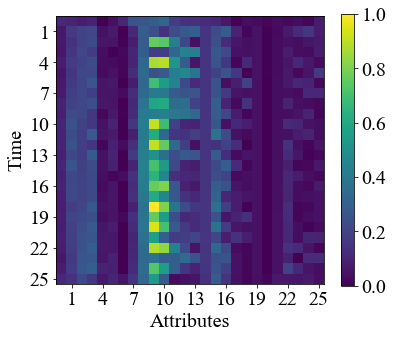

In [73]:
plt.figure(figsize=(6, 5))
plt.imshow(x1_)
plt.colorbar()
scale = [i for i in range(1,27,3)]
plt.xticks(scale)
plt.yticks(scale)
plt.ylabel('Time')
plt.xlabel('Attributes')
plt.savefig(saveRoot + str(sample) + "_x1.svg")

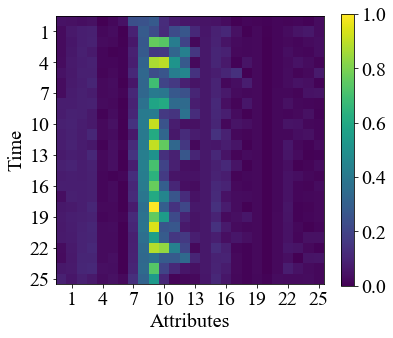

In [74]:
plt.figure(figsize=(6, 5))
plt.imshow(x1_atten_)
plt.colorbar()
scale = [i for i in range(1,27,3)]
plt.xticks(scale)
plt.yticks(scale)
plt.ylabel('Time')
plt.xlabel('Attributes')
plt.savefig(saveRoot + str(sample) + "_atten1.svg")

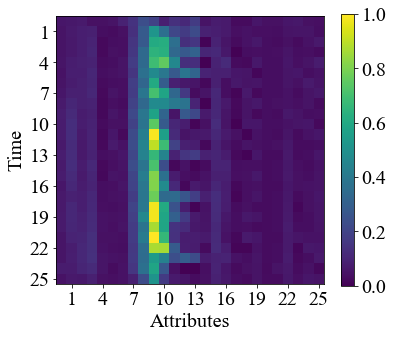

In [75]:
plt.figure(figsize=(6, 5))
plt.imshow(x2_)
plt.colorbar()
scale = [i for i in range(1,27,3)]
plt.xticks(scale)
plt.yticks(scale)
plt.ylabel('Time')
plt.xlabel('Attributes')
plt.savefig(saveRoot + str(sample) + "_x2.svg")

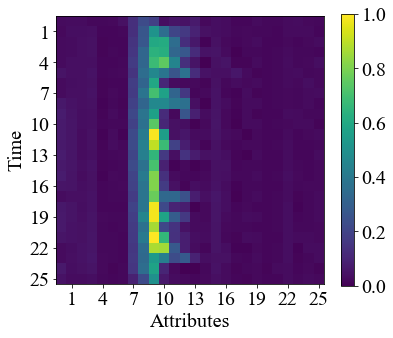

In [76]:
plt.figure(figsize=(6, 5))
plt.imshow(x2_atten_)
plt.colorbar()
scale = [i for i in range(1,27,3)]
plt.xticks(scale)
plt.yticks(scale)
plt.ylabel('Time')
plt.xlabel('Attributes')
plt.savefig(saveRoot + str(sample) + "_atten2.svg")